====>The Iris flower classification is one of the most popular beginner friendly machine learning project.

====>The task is to classify iris flowers into three species — Setosa, Versicolor, Virginica — based on four features:
1.Sepal Length
2.Sepal Width
3.Petal Length
4.Petal Width

===>Dataset
1.The Iris dataset is built into many ML libraries (like scikit-learn).
2.It has 150 samples: 50 for each species.
3.Each sample has 4 numeric features and a label (species).

But in this classification model I load the dataset manually.

In [35]:
#import libraries
import pandas as pd

In [36]:
iris = pd.read_csv('IRIS.csv')
print(f"Dataset dimensionality : {iris.shape}")
iris.head()

Dataset dimensionality : (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
X = iris[features]
y = iris['species']

In [38]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
#encode target to convert into numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [40]:
#split dataset into 2 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

In [41]:
#Standarization for better performace
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
#==================
#Define classifiers
#==================

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}
#============================
#train & evaluate classifiers
#============================

results = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"=== {name} ===")
    print("Accuracy:",acc)
    print(classification_report(y_test, pred))
    results.append((name,acc))
    print("\n")
print(results)

=== Logistic Regression ===
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



=== KNN ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



=== SVM ===
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
 

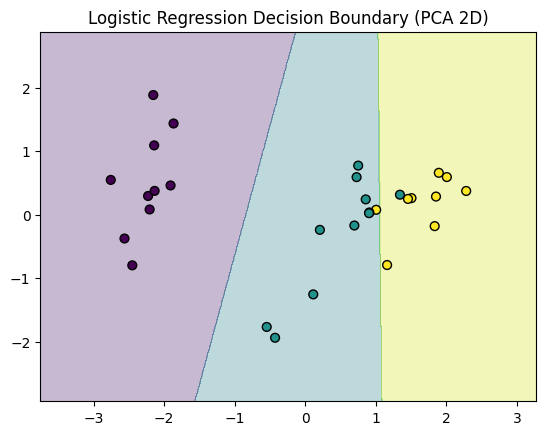

In [46]:
#===========================
#visualize decision boundary
#===========================

from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#reduce feature to 2D
pca = PCA(n_components = 2)
X_train_2D = pca.fit_transform(X_train_scaled)
X_test_2D = pca.transform(X_test_scaled)

#plot function
def decision_boundary(classifiers,X,y,title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = classifiers.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.viridis)
    plt.title(title)
    plt.show()

#Logistic Regression on 2D PCA
clf_lr_2d = LogisticRegression(max_iter=200)
clf_lr_2d.fit(X_train_2D, y_train)
decision_boundary(clf_lr_2d, X_test_2D, y_test, "Logistic Regression Decision Boundary (PCA 2D)")

In [49]:
import joblib
joblib.dump(classifiers, "iris_classifier_model.pkl")

['iris_classifier_model.pkl']